## Cars Segmentation using Hierarchical Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 

In [2]:
# !wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-06-24 13:47:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.001s  

2020-06-24 13:47:41 (30.5 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [3]:
# ! ls | grep .csv

ChurnData.csv
Cust_Segmentation.csv
FuelConsumption.csv
PriceRange.csv
cars_clus.csv
cell_samples.csv
drug200.csv
teleCust1000t.csv


In [4]:
dataset = pd.read_csv("cars_clus.csv")

In [5]:
dataset

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


In [6]:
dataset.drop(dataset[["manufact","model","partition","type"]], axis =1, inplace=True)

In [7]:
dataset

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.919,16.360,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828
1,39.384,19.875,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673
2,14.114,18.225,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647
3,8.588,29.725,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150
4,20.397,22.255,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015
...,...,...,...,...,...,...,...,...,...,...,...,...
154,17.531,$null$,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864
155,3.493,$null$,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251
156,18.969,$null$,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943
157,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$


In [8]:
print((159*12))

dataset.size #It returns the total no. of elements a dataset has. Calculated by (rows * columns)

1908


1908

## Feature Engineering
In the next few code blocks I have done the feature engineering part and feature slection part so that I can prepare my dataset for training and model will have better performance.

In [9]:
import seaborn as sns
sns.set()

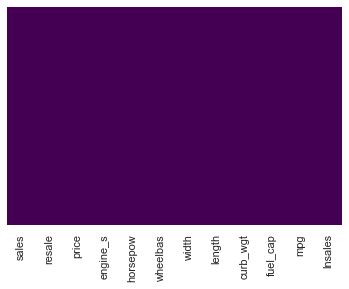

In [10]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')

In [11]:
dataset = dataset[[ 'sales', 'resale', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors="coerce")

dataset = dataset.dropna()

In [12]:
dataset.head(20)

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
5,18.780,23.555,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933
6,1.380,39.000,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322
8,9.231,28.675,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223
9,17.527,36.125,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864
10,91.561,12.475,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517
11,39.350,13.740,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672


In [13]:
dataset.size

1404

In [14]:
X = dataset[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg','resale']]

In [15]:
X.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,resale
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,29.725
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255
5,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,23.555


In [16]:
X.corr()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,resale
engine_s,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724829,0.527187
horsepow,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595963,0.773110
wheelbas,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470685,-0.053685
width,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599613,0.178128
length,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465722,0.025390
curb_wgt,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818973,0.363274
fuel_cap,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808633,0.324796
mpg,-0.724829,-0.595963,-0.470685,-0.599613,-0.465722,-0.818973,-0.808633,1.000000,-0.399097
resale,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.399097,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_scaled = sc.fit_transform(X)

In [43]:
type(X_scaled)

numpy.ndarray

## Model Creation and Prediction

In [21]:
# To calculate the distance between the data points of combined clusters
distance_matrix = distance_matrix(X_scaled,X_scaled) 
print(distance_matrix)

[[0.         3.382149   4.50146639 ... 1.58695479 1.41573428 1.12127301]
 [3.382149   0.         1.58998659 ... 2.25946696 3.84425578 3.67765542]
 [4.50146639 1.58998659 0.         ... 3.28803788 4.8036959  4.69389603]
 ...
 [1.58695479 2.25946696 3.28803788 ... 0.         2.33213433 2.02922505]
 [1.41573428 3.84425578 4.8036959  ... 2.33213433 0.         0.82868663]
 [1.12127301 3.67765542 4.69389603 ... 2.02922505 0.82868663 0.        ]]


In [38]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
model.fit(X_scaled)
output = model.labels_
print(output)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 1 1 1 1 0 1 0 1 1 1 2 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 2 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 2 2 2 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1]


In [39]:
dataset["Output"] = output

In [40]:
dataset

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,Output
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,1
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,1
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,1
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,1


In [41]:
X

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,resale
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,29.725
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255
5,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,23.555
...,...,...,...,...,...,...,...,...,...
145,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,11.425
146,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,13.240
147,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,16.725
148,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,16.575


In the next code block for plotting graph, you need to understand the concept of array. Here Initially we have converted our dataset into array after filling null values. Performing scaling on dataset, it converts the pandas dataframe into array and also we have given X_scaled for training our model. So in our X_scaled we have only 9 columns as you can see above, so for plotting graph we need to use the concept of array for giving x-axis and y-axis columns for plotting graph.
You can also coustomise the graph in a better way for better understanding of the analysis

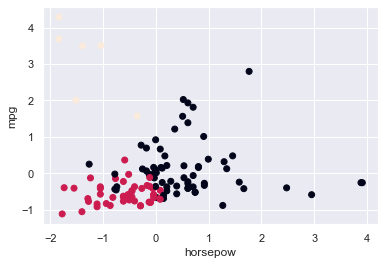

In [42]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 8], c=dataset["Output"])
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.show()